Gerando plot do trajeto (pode levar alguns segundos)...


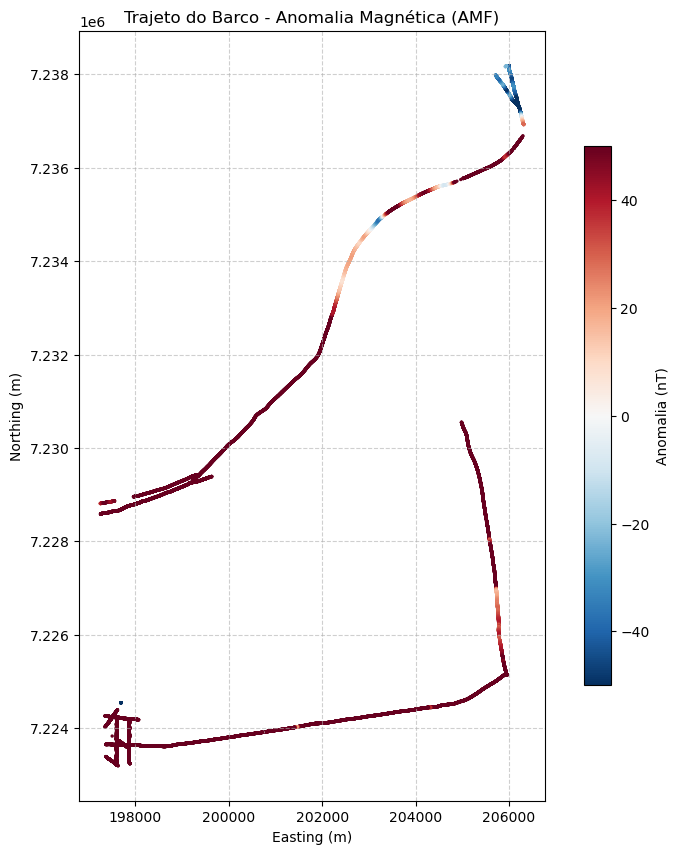

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definir o caminho e carregar os dados ---
# (Este é o arquivo final do seu Notebook 2)
file_path = 'marco-mag/data/Magnetometry/merged_data/can_mag_corr.csv'

try:
    df_corr = pd.read_csv(file_path, low_memory=False)
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em '{file_path}'")
    # (Encerra aqui se não achar o arquivo)
else:

    # --- 2. Limpeza para o Plot ---
    # Remove linhas onde falta alguma coordenada ou o próprio AMF
    df_plot = df_corr.dropna(subset=['Mag_Easting', 'Mag_Northing', 'AMF']).copy()

    # !! FILTRO DE OUTLIER (O PASSO MAIS IMPORTANTE) !!
    # Remove os pontos "lixo" que vimos no diagnóstico (Easting > 400000)
    df_plot = df_plot[df_plot.Mag_Easting < 400000].copy()


    # --- 3. Plotar os dados ---
    if df_plot.empty:
        print("Dados vazios após a filtragem. Nada para plotar.")
    else:
        print("Gerando plot do trajeto (pode levar alguns segundos)...")
        
        plt.figure(figsize=(10, 10))
        
        # O "scatter plot" é o que faz o mapa de pontos
        # x = Easting, y = Northing, c = cor (AMF)
        sc = plt.scatter(
            df_plot.Mag_Easting,
            df_plot.Mag_Northing,
            c=df_plot.AMF,         # Define a cor de acordo com a coluna AMF
            cmap='RdBu_r',      # Mapa de cores "polar" (Red-Blue, revertido)
            s=2,                # Tamanho de cada ponto
            vmin=-50,           # (Opcional) Trava o limite de cor min
            vmax=50             # (Opcional) Trava o limite de cor max
        )
        
        # --- 4. Configurações do Gráfico ---
        plt.xlabel('Easting (m)')
        plt.ylabel('Northing (m)')
        plt.title('Trajeto do Barco - Anomalia Magnética (AMF)')
        plt.grid(True, linestyle='--', alpha=0.6) # Adiciona um grid
        
        # ESSENCIAL: Garante que o mapa não fique distorcido
        plt.gca().set_aspect('equal')
        
        # Adiciona a barra de cores
        cbar = plt.colorbar(sc, shrink=0.7, label='Anomalia (nT)')
        
        # Salva a figura (opcional)
        plt.savefig("mapa_trajeto_amf.png", dpi=150, bbox_inches='tight')
        
        # Mostra o gráfico no notebook
        plt.show()